# Cat pic classifier

## Import library

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## Get data

### Load h5

In [2]:
f = h5py.File('data/train_catvnoncat.h5', 'r')
list(f.keys())

['list_classes', 'train_set_x', 'train_set_y']

### Get training data set

The training dataset has 209 examples. Each example image represents and RGB image size 64x64.

In [3]:
list_classes = f['list_classes'][()]
train_set_x = f['train_set_x'][()]
train_set_y = f['train_set_y'][()]

In [4]:
list_classes.shape, train_set_x.shape, train_set_y.shape

((2,), (209, 64, 64, 3), (209,))

In [5]:
list_classes[()]

array([b'non-cat', b'cat'], dtype='|S7')

Plotting the occurence of two outputs - non-cat and cat - shows there are twice more non-cats than cats.

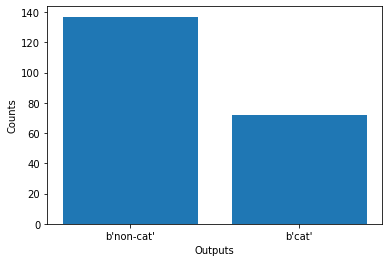

In [6]:
uniques, counts = np.unique(train_set_y[()], return_counts=True)
plt.bar(uniques, counts)
plt.xticks(uniques, list_classes[()])
plt.xlabel("Outputs")
plt.ylabel("Counts")
plt.show()

### Preview some images

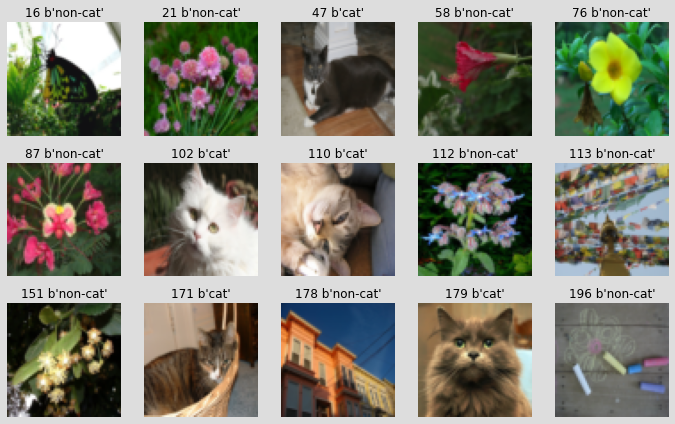

In [7]:
fig=plt.figure(figsize=(10, 6))
columns = 5
rows = 3

np.random.seed(seed=1112)
indexes = np.sort(np.random.choice(len(train_set_x), size=columns*rows, replace=False))

for i in range(1, columns*rows+1):
    index = indexes[i-1]
    img = train_set_x[index]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
    
    subplot_title = "{} {}".format(str(index), str(list_classes[train_set_y[index]]))
    plt.title(subplot_title)
    plt.tight_layout()

fig.set_facecolor('#dddddd')
plt.show()

### Preview one input image 

In [8]:
np.shape(train_set_x[179]), np.max(train_set_x), np.min(train_set_x)


((64, 64, 3), 255, 0)

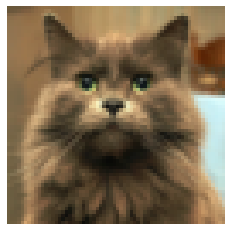

In [9]:
plt.imshow(train_set_x[179])
plt.axis('off')
plt.show()

## Preprocessing data

### Processing training input data

In [10]:
m, h, w, d = np.shape(train_set_x)
n_x = h * w * d
print("train_set_x shape: {}. There are {} training examples. Each training example has {} features"
      .format(np.shape(train_set_x), m, n_x))

train_set_x shape: (209, 64, 64, 3). There are 209 training examples. Each training example has 12288 features


X needs to be reshaped and normalised to be fitting into training model. Initially **train_data_set** has a shape of (209, 64, 64, 3) and needs to be shaped into this format, where each ecample is placed into columns
![x_vector.png](img/x_vector.png)
The dataset also needs to be normalised, which can be achieved by dividing it to 255

In [11]:
processed_train_set_x = train_set_x.flatten().reshape(m, n_x).T / 255
processed_train_set_x.shape

(12288, 209)

In [12]:
input_x_shape_error = "processed training set should be {}, but got {}".format((n_x,m),processed_train_set_x.shape)
assert processed_train_set_x.shape == (n_x, m), input_x_shape_error

### Processing training output data

Reshaping the training output into matrix of following property. Note this matrix is 2D, to make matrix multiplication easier, also good practice (suggested by Andrew Ng)
![y_vector.png](img/y_vector.png)

In [13]:
processed_train_set_y = train_set_y.reshape(1, m)
processed_train_set_y.shape

(1, 209)

## Create and the model

![model.png](img/model.png)

### Initialising weights and bias

In [14]:
np.random.seed(1)
w = np.random.uniform(low=-0.5, high=0.5, size=(n_x, 1))
b = np.random.uniform(low=-0.5, high=0.5)
w.shape, b

((12288, 1), 0.20793428637881872)

### Define sigmoid to be used as activation function

In [15]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

### Assemble everything and make initial guesses

Test matrix multiplication

In [16]:
A = sigmoid(np.dot(w.T, processed_train_set_x) + b)
A.shape

(1, 209)

Map probability to choice whether the pic is cat or non-cat

In [17]:
initial_guess = np.where(A < 0.5, 0., 1.)
initial_guess

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
        0.]])

Calculate accuracy of initial guesses

In [18]:
"Accuracy {}%".format(np.round(np.sum(initial_guess == processed_train_set_y) / m * 100, 2))

'Accuracy 68.9%'

It is also noted that initialise any weight and bias, ie. any seeds, or zero w/b, will always yield accuracy of 68.9%, which is roughly the proportion of non-cat pics within the training dataset.

### Cost function

Calculate loss for each training example using formula
![loss.png](img/loss.png)

In [19]:
loss_matrix = -(processed_train_set_y * np.log10(A) + (1 - processed_train_set_y) * np.log10(1 - A))

Calculate cost function, by calculating the average loss of all training example

In [20]:
cost = np.sum(loss_matrix)/m
cost

0.9545378958570325

### Calculate gradient of weight and bias

Needed for gradient descent

In [21]:
dz = A - processed_train_set_y
dw = np.dot(processed_train_set_x, dz.T) / m
dw, dw.shape

(array([[-0.02098793],
        [-0.01032658],
        [-0.00856432],
        ...,
        [-0.04413312],
        [-0.04007088],
        [-0.04556723]]),
 (12288, 1))

In [22]:
db = np.sum(dz) / m
db

-0.0730494307314788

## Assemble the model and train

### Create model class

In [23]:
class model:
    def __init__(self, training_x, training_y, alpha = 0.1, seed = 1, max_iter = 20):
        self.training_x = training_x
        self.training_y = training_y
        self.n_x, self.m = training_x.shape
        
        np.random.seed(seed)
        self.__w = np.random.uniform(low=-0.5, high=0.5, size=(n_x, 1))
        self.__b = np.random.uniform(low=-0.5, high=0.5)
        
        self.alpha = alpha 
        self.max_iter = max_iter
        self.current_iter = 0
        
        self.__cost_list = []
        self.__acc_list = []
    
    def train(self):
        print("Iter 0: Cost {}, accuracy {}".format(self.cost(), self.accuracy()))
        previous_cost = self.cost();
        for i in range(self.max_iter):
            dz = self.__A() - self.training_y
            dw = np.dot(self.training_x, dz.T) / self.m
            db = np.sum(dz) / self.m
            self.__w -= self.alpha * dw
            self.__b -= self.alpha * db
            
            cost = self.cost()
            acc = self.accuracy()
            
            if (i + 1) % 1000 == 0:
                print("Iter {}: Cost {}, accuracy {}".format(i + 1, cost, acc))
                
            if (cost > previous_cost):
                print("Iter {}: Cost {}, accuracy {}".format(i + 1, cost, acc))
                print("Cost increased. Stopping at iter no {}".format(i+1))
                break;
            
            previous_cost = cost
            self.__cost_list.append(cost)
            self.__acc_list.append(acc)
            self.current_iter += 1;     

        print("DONE")
    
    def plot_cost(self):
        fig=plt.figure(figsize=(10, 5))
        
        fig.add_subplot(1, 2, 1)
        plt.plot(range(1, self.current_iter+1), self.__cost_list)
        plt.xlabel("Iter. No")    
        plt.ylabel("Cost")
        plt.title("Iteration number v. Cost")
        
        fig.add_subplot(1, 2, 2)
        plt.plot(range(1, self.current_iter+1), self.__acc_list)
        plt.xlabel("Iter. No")    
        plt.ylabel("Accuracy")
        plt.title("Iteration number v. Accuracy")
        plt.tight_layout()
        
        fig.set_facecolor('#dddddd')
        plt.show()
        
    def get_weight(self):
        return self.__w
    
    def get_bias(self):
        return self.__b
    
    def __A(self):
        return sigmoid(np.dot(self.__w.T, self.training_x) + self.__b)
        
    def accuracy(self):
        initial_guess = np.where(self.__A() < 0.5, 0., 1.)
        accuracy = np.sum(initial_guess == self.training_y) / self.m
        return accuracy
    
    def cost(self):
        loss_matrix = -(self.training_y * np.log10(self.__A()) + (1 - self.training_y) * np.log10(1 - self.__A()))
        cost = np.sum(loss_matrix)/self.m
        return cost
    

### Create and train model object

In [24]:
train_model = model(processed_train_set_x, processed_train_set_y, alpha=0.001, max_iter=10000)

In [25]:
train_model.train()

Iter 0: Cost 0.9545378958570325, accuracy 0.6889952153110048
Iter 1000: Cost 0.5061091386552241, accuracy 0.6889952153110048
Iter 2000: Cost 0.3306398986080104, accuracy 0.7272727272727273
Iter 3000: Cost 0.23681270227079998, accuracy 0.7655502392344498
Iter 4000: Cost 0.1806432905864154, accuracy 0.8086124401913876
Iter 5000: Cost 0.14586116002456778, accuracy 0.8325358851674641
Iter 6000: Cost 0.12185678163363427, accuracy 0.8899521531100478
Iter 7000: Cost 0.10401057198301938, accuracy 0.8947368421052632
Iter 8000: Cost 0.09027929114992786, accuracy 0.9234449760765551
Iter 9000: Cost 0.07948932648086185, accuracy 0.9521531100478469
Iter 10000: Cost 0.07087537778912463, accuracy 0.9665071770334929
DONE


### Visualise the model performance

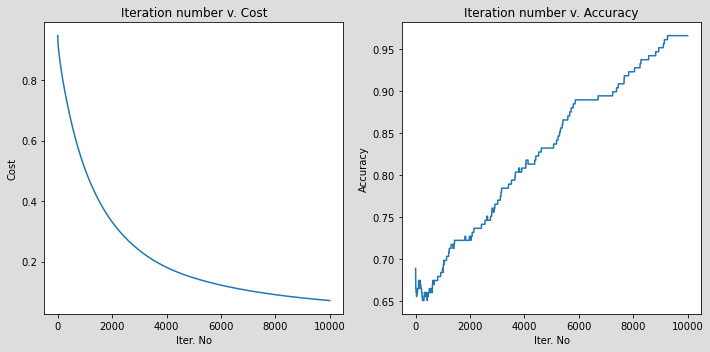

In [26]:
train_model.plot_cost()

### Get weight and bias

In [27]:
train_model.get_weight(), train_model.get_bias()

(array([[-0.09861959],
        [ 0.16333108],
        [-0.53993188],
        ...,
        [-0.14074935],
        [-0.39081954],
        [ 0.08117882]]),
 0.20910881461057382)

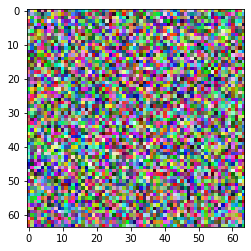

In [28]:
plt.imshow(((train_model.get_weight().reshape(64, 64, 3) + train_model.get_bias()) * 255).astype(np.uint8))
plt.show()

### Save weight and bias for future use

In [29]:
np.savetxt('weight.txt', train_model.get_weight())
np.savetxt('bias.txt', train_model.get_bias().reshape((1,1)))